# Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

## Import Libraries
Import all necessary libraries


In [250]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score ,confusion_matrix
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-bright')
%matplotlib inline

### The Data
Read the train dataset in to a pandas dataframe

In [251]:
# import elements related to the classification model like Sex, Age, SibSp etc. and drop the elements which we don't need
result_train = pd.read_csv("titanic_train.csv")
result_test = pd.read_csv("titanic_test.csv")
result_train.drop(['Name','Ticket','PassengerId'], axis = 1, inplace = True)
result_test.drop(['Name','Ticket','PassengerId'], axis = 1, inplace = True)
result_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# Exploratory Data Analysis

## Missing Data
Use the heatmap functionality of seaborn to see where we are missing data.

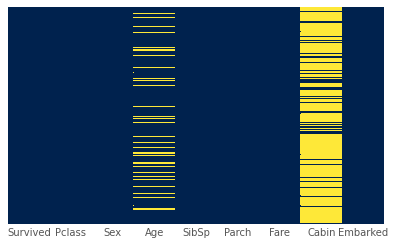

In [252]:
# Use the heatmap functionality to check where we are missing data.
sns.heatmap(result_train.isnull(), cmap = 'cividis', cbar = False, yticklabels = False)

Create a histogram for the target variable "Survived". You can use the seaborn.countplot function. 

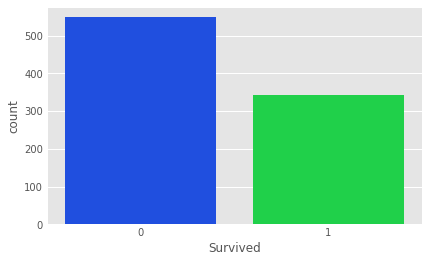

In [253]:
# Create a histogram for the target variable "Survived"
sns.countplot(x = result_train['Survived'])

Create a histogram for the target variable "Survived" for males and females. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


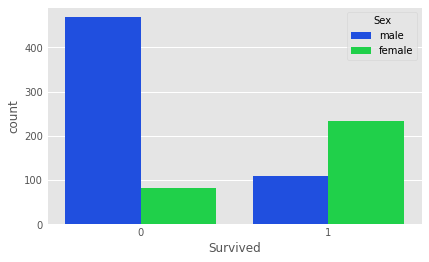

In [254]:
# Create a histogram for the target variable "Survived" for different sex
sns.countplot(result_train['Survived'], hue = result_train['Sex'])

Create a histogram for the  "Pclass" feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


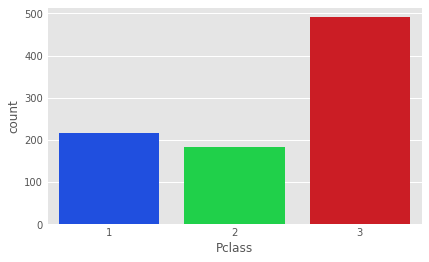

In [255]:
# Create a histogram for the "Pclass"
sns.countplot(result_train['Pclass'])

## Data Cleaning
Fill in the missing data points with the average age for the age column. Drop the Cabin columna and all the row that have feature Emkarked that is NaN. 

In [256]:
# Fill in the missing data points with the average age for the age column
result_train['Age'].fillna(result_train['Age'].mean(), inplace = True)
result_test['Age'].fillna(result_test['Age'].mean(), inplace = True)

# Drop the Cabin columna
result_train.drop(['Cabin'], inplace = True, axis = 1)
result_test.drop(['Cabin'], inplace = True, axis = 1)

# Drop all the row that have feature Emkarked that is NaN.
result_train["Embarked"].dropna()
result_test["Embarked"].dropna()

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

## Converting Categorical Features 

Use pandas.get_dummies() function to convert categorical data

In [257]:
# convert categorical data with pandas.get_dummies()
result_train = pd.get_dummies(result_train, drop_first = True)
result_test = pd.get_dummies(result_test, drop_first = True)
result_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Model
## Train Test Split

In [258]:
# split the test
xTrain, xTest, yTrain, yTest = train_test_split(result_train.drop(['Survived'], axis = 1), result_train['Survived'], test_size = 0.30, random_state = 42)

## Training and Predicting

Train a Logistic Regression model with the training data. 

In [259]:
# Train a Logistic Regression model with the training data
L_R = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 6, fit_intercept = True, intercept_scaling = 1, class_weight = None)
L_R.fit(xTrain, yTrain)
test_predict = L_R.predict(xTest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Evaluation

Compute precision, recall, f1-score. Use the classification report from sklearn.metrics.

In [260]:
# Use the classification report
print(classification_report(yTest,test_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



# Support Vector Machines

## Train a Support Vector Classifier

In [261]:
# Train a Support Vector Classifier
svc_model = SVC()
svc_model.fit(xTrain, yTrain)
print(confusion_matrix(yTest,svc_model.predict(xTest)))
print(classification_report(yTest,svc_model.predict(xTest)))

[[148   9]
 [ 82  29]]
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       157
           1       0.76      0.26      0.39       111

    accuracy                           0.66       268
   macro avg       0.70      0.60      0.58       268
weighted avg       0.69      0.66      0.61       268



## Gridsearch Practice
Apply GridSearch to find the optimal values of C and gamma. Create a GridSearchCV object and fit it to the training data.

In [262]:
# Apply GridSearch to find the optimal values of C and gamma
param_grid = {'C': [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000], 'gamma': [100,10,1,0.1,0.01,0.001,0.0001]}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, scoring = 'accuracy', refit = True, verbose = 1)
grid.fit(result_train.drop(['Survived'], axis = 1), result_train['Survived'])

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100,
                               300, 1000],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy', verbose=1)

In [263]:
# print grid result
print(grid.best_params_)
print(grid.best_estimator_)

# print Mean cross-validated score and The number of cross-validation splits
print('the number of cross-validation splits (folds or iterations) is: ', grid.n_splits_)
print('the mean cross-validated score of the best_estimator is: ', grid.best_score_)

{'C': 300, 'gamma': 0.001}
SVC(C=300, gamma=0.001)
the number of cross-validation splits (folds or iterations) is:  5
the mean cross-validated score of the best_estimator is:  0.796874019207834


## Evaluation

Evaluate the grid model by computing the precision, recall and f1-score. Use the classification report from sklearn.metrics.

In [264]:
# Use the classification report from sklearn.metrics.
svc_model = SVC(C = 300, gamma = 0.001)
svc_model.fit(xTrain, yTrain)
print(confusion_matrix(yTest,svc_model.predict(xTest)))
print(classification_report(yTest,svc_model.predict(xTest)))

[[137  20]
 [ 35  76]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.79      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



## OPEN END QUESTION
Compare the performance of the logistic regression model and SVM in two paragraphs. Which one is performing better? Why? 



The Logistic regression is an algorithm that is used in solving classification problems. It is a predictive analysis way to describes data and explains the relationship between variables. Logistic regression is applied to an input variable (X) where the output variable (y) is a discrete value which ranges between 1 (yes) and 0 (no).It uses logistic (sigmoid) function to find the relationship between variables. The sigmoid function is an S-shaped curve that can take any real-valued number and map it to a value between 0 and 1, but never exactly at those limits.

The support vector machine(SVM) is a model used for both classification and regression problems though it is mostly used to solve classification problems. The algorithm creates a hyperplane or line(decision boundary) which separates data into classes. It uses the kernel trick to find the best line separator (decision boundary that has same distance from the boundary point of both classes). It is a clear and more powerful way of learning complex non-linear functions.

SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not, instead it can have different decision boundaries with different weights that are near the optimal point. SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables.
SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches. The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting.

Depending on the number of training sets (data)/features that we have, we can use either logistic regression or support vector machine(We can assume that n = the number of features and m = the number of training examples):
1. If n is large (1–10,000) and m is small (10–1000) : use logistic regression or SVM with a linear kernel.
2. If n is small (1–10 00) and m is intermediate (10–10,000) : use SVM with (Gaussian, polynomial etc) kernel
3. If n is small (1–10 00), m is large (50,000–1,000,000+): first, manually add more features and then use logistic regression or SVM with a linear kernel

In conclusion, it is usually advisable to try to use logistic regression first to see how the model does, if it fails then we should try using SVM without a kernel (is otherwise known as SVM with a linear kernel). Logistic regression and SVM with a linear kernel have similar performance but depending on the features we need, one may be more efficient than the other.